In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("Ecommerce Customers")

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.describe(include='all')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


In [6]:
data.drop(columns=['Email','Address','Avatar'],axis=1,inplace=True)
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [7]:
data.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

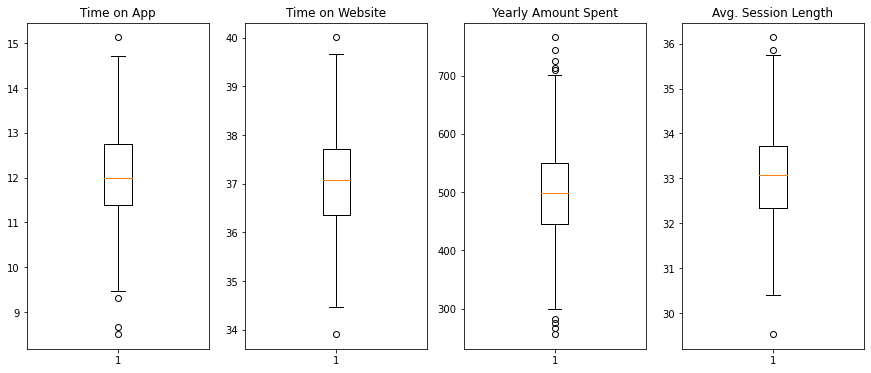

In [8]:
f, (ax1, ax2, ax3,ax4,) = plt.subplots(1, 4,figsize=(15,6))
ax1.boxplot(data['Time on App'])
ax1.set_title('Time on App')
ax2.boxplot(data['Time on Website'])
ax2.set_title('Time on Website')
ax3.boxplot(data['Yearly Amount Spent'])
ax3.set_title('Yearly Amount Spent')
ax4.boxplot(data['Avg. Session Length'])
ax4.set_title('Avg. Session Length')
plt.show()

<AxesSubplot:>

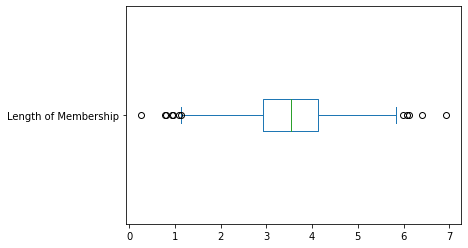

In [9]:
data['Length of Membership'].plot(kind='box',vert=False)

In [10]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


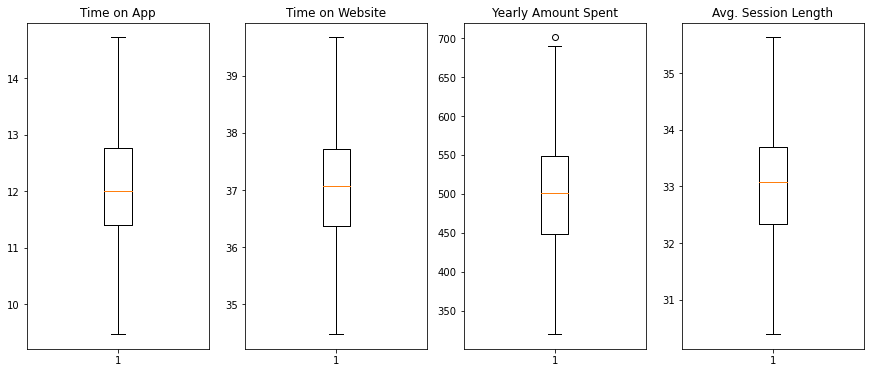

In [11]:
f, (ax1, ax2, ax3,ax4,) = plt.subplots(1, 4,figsize=(15,6))
ax1.boxplot(data['Time on App'])
ax1.set_title('Time on App')
ax2.boxplot(data['Time on Website'])
ax2.set_title('Time on Website')
ax3.boxplot(data['Yearly Amount Spent'])
ax3.set_title('Yearly Amount Spent')
ax4.boxplot(data['Avg. Session Length'])
ax4.set_title('Avg. Session Length')
plt.show()

<AxesSubplot:xlabel='Length of Membership', ylabel='Count'>

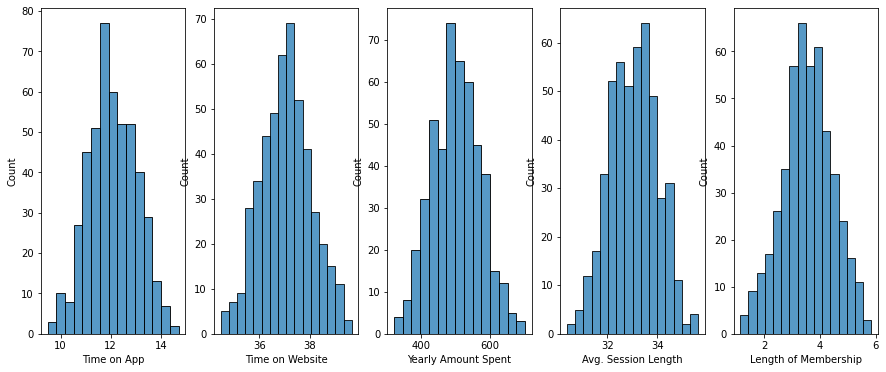

In [13]:
f, ax = plt.subplots(1, 5,figsize=(15,6))
sbn.histplot(data['Time on App'],ax=ax[0])
sbn.histplot(data['Time on Website'],ax=ax[1])
sbn.histplot(data['Yearly Amount Spent'],ax=ax[2])
sbn.histplot(data['Avg. Session Length'],ax=ax[3])
sbn.histplot(data['Length of Membership'],ax=ax[4])

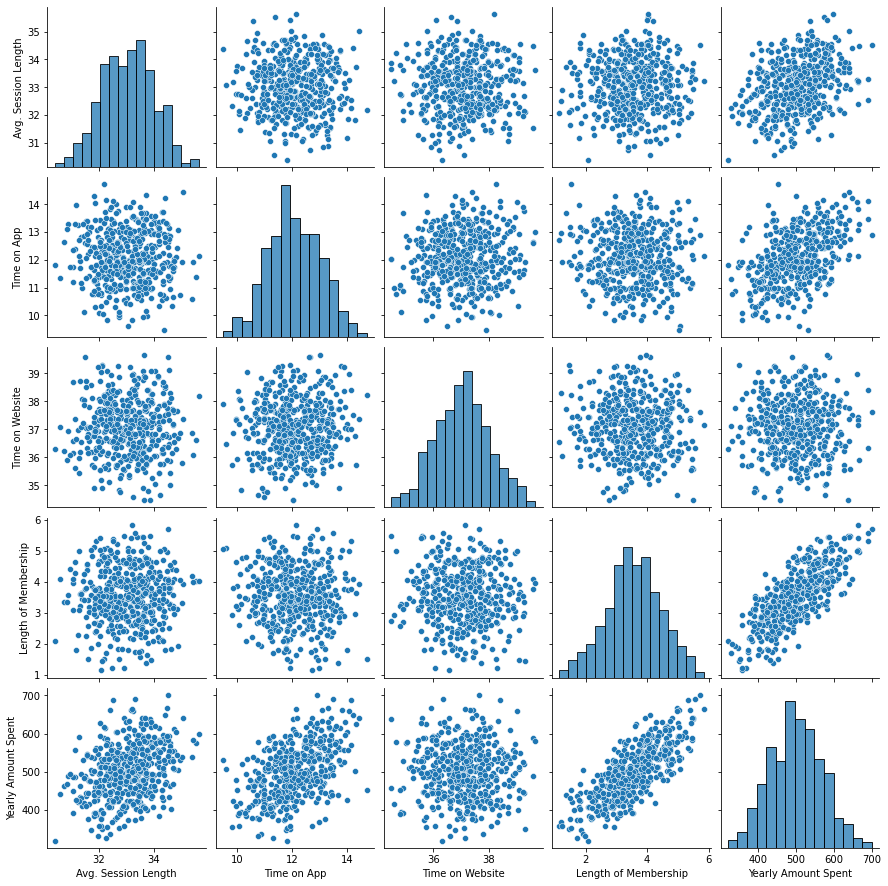

In [15]:
sbn.pairplot(data)
plt.show()

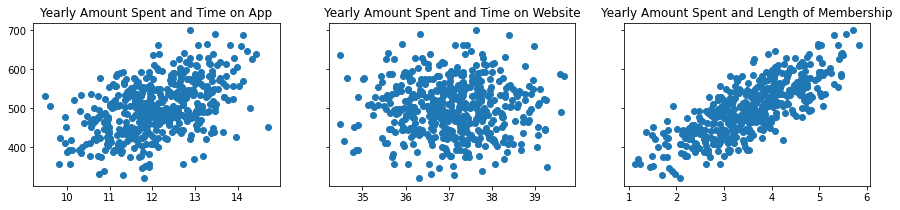

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data['Time on App'],data['Yearly Amount Spent'])
ax1.set_title('Yearly Amount Spent and Time on App')
ax2.scatter(data['Time on Website'],data['Yearly Amount Spent'])
ax2.set_title('Yearly Amount Spent and Time on Website')
ax3.scatter(data['Length of Membership'],data['Yearly Amount Spent'])
ax3.set_title('Yearly Amount Spent and Length of Membership')

plt.show()

In [17]:
data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.038177,-0.004834,0.013809,0.339804
Time on App,-0.038177,1.000000,0.065210,-0.054382,0.475560
Time on Website,-0.004834,0.065210,1.000000,-0.046572,0.000581
Length of Membership,0.013809,-0.054382,-0.046572,1.000000,0.767651
Yearly Amount Spent,0.339804,0.475560,0.000581,0.767651,1.000000


<AxesSubplot:>

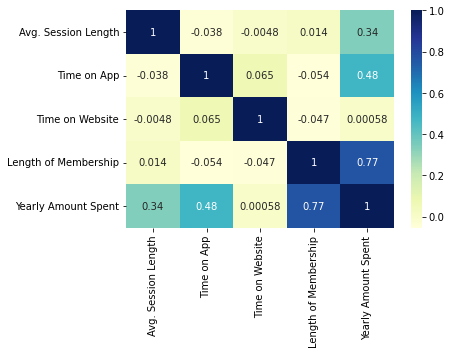

In [19]:
sbn.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [20]:
X = data["Yearly Amount Spent"].values
Y = data["Length of Membership"].values

In [22]:
X.shape

(476,)

In [23]:
Y.shape

(476,)

In [26]:
x = X.reshape(-1,1)
y = Y

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=48)

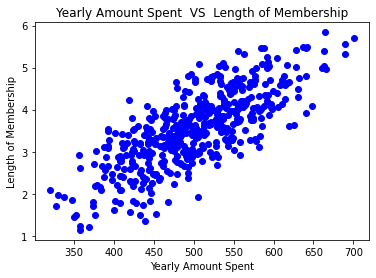

None


In [30]:
plt.scatter(X,Y,color="blue")
plt.title("Yearly Amount Spent  VS  Length of Membership")
plt.xlabel("Yearly Amount Spent")
plt.ylabel("Length of Membership")
print(plt.show())

In [31]:
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred = linear_regression.predict((x_test))
y_pred

array([4.43732451, 3.96460974, 3.75715183, 2.77897741, 3.14201009,
       3.32179169, 2.94383089, 2.92822284, 4.80132206, 4.00264445,
       2.88601031, 2.53060525, 3.66319517, 2.98875117, 4.23417011,
       3.03209177, 4.21527889, 2.57015194, 4.45589512, 1.83141076,
       4.82215328, 4.06985122, 3.89628543, 4.01575979, 3.42180683,
       4.78127902, 3.5230337 , 3.82523536, 4.2951394 , 2.81896408,
       3.19253768, 3.72207707, 3.36220554, 4.08859823, 3.32497387,
       3.41358796, 4.66976989, 4.28746147, 3.95840057, 4.10580029,
       3.37524144, 2.42561816, 3.86002145, 4.92714714, 3.91102929,
       3.55718004, 3.59708391, 3.6231566 , 2.75358532, 4.62431685,
       3.38713075, 4.46417023, 4.48986886, 4.35714227, 3.22944925,
       3.29217156, 2.92709645, 4.4520548 , 4.23995749, 3.47447117,
       4.72079785, 2.45098947, 2.42386346, 4.10554498, 3.16037856,
       2.23912883, 3.75266904, 3.94198661, 3.3313628 , 3.60950722,
       3.2147745 , 4.08045706, 3.15748838, 3.32513814, 3.93421

In [37]:
linear_regression.score(x_train, y_train)

0.5807553745663296

In [41]:
linear_regression.predict([[580]])

array([4.32672271])